# By Rahmandhika Tri Putra

#### This .ipnyb file is an experiment of data analytics work on police_fatalities dataset
#### The dataset can be downloaded through this website "https://www.kaggle.com/rishidamarla/individuals-killed-by-the-police"

##    

#### import all important packages and dataset

In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import numpy as np

df = pd.read_csv("C:/work/kaggle/murder_cases/Police Fatalities.csv")
#Change WA abbreviation to DC
df["State"] = df["State"].apply(lambda x : "WA" if x == "DC" else x)

#### Create a regression model from year data

In [35]:
#converting date into datetime object
dates = list(df["Date"])
new_date = []
for date in dates:
    new_date.append(datetime.datetime.strptime(date, "%m/%d/%Y"))
df["Date"] = new_date
df["year"] = df["Date"].apply(lambda x: x.year)
year_count = df.groupby("year")["Name"].count().reset_index()

In [36]:
#counting the slope(m) and y-intercept (b)
x = np.array(list(year_count["year"]))
y = np.array(list(year_count["Name"]))

In [37]:
#counting the slope (m) using r*(stdy/stdx)
sigma_mean_x_y = ((x-x.mean())/x.std()) * ((y-y.mean())/y.std())
r = (1/(len(x) - 1)) * sigma_mean_x_y.sum()
r_squared = r**2
m_1st = r*(y.std()/x.std())
b_1st = y.mean() - (x.mean()*m_1st)

In [38]:
#counting the slope (m) using the best fit formula
m_2nd = ((x.mean()*y.mean()) - ((x*y).mean())) / (((x.mean())**2) - ((x**2).mean()))
b_2nd = y.mean() - (x.mean()*m_2nd)

In [39]:
#finding the RMSD
y_obs = (m_2nd*x + b_2nd)
numerator = ((y - y_obs)**2)
denumerator = (len(x))
rmsd = (numerator.sum()/denumerator)**(1/2)

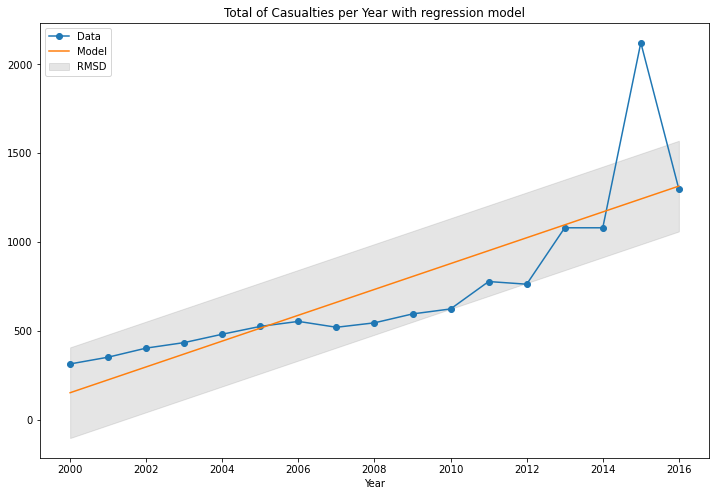

In [40]:
#plotting the dataset and the regression model
plt.subplots(figsize = (12,8))
plt.plot(x, y, marker = ("o"), label = "Data")
plt.plot(x, m_2nd*x + b_2nd, label = "Model")
plt.fill_between(x, y_obs+rmsd, y_obs-rmsd, color = "gray", label = "RMSD", alpha = 0.2)
plt.legend()
plt.xlabel("Year")
plt.title("Total of Casualties per Year with regression model")
plt.show()

#### Based on the regression model, the model predicted that every year there is a possibility the casualty cases will be an increment by 72.55 cases. The RMSD also tells that the model have an error of prediction for 254.67, means that there is a chance for the future case will be around +254.67 and -254.67 cases

#### Create a histogram graph to visualize the deceased, unarmed people 

In [41]:
#filtering the data
not_flee = not_flee = df[df["Flee"] != True]
unarmed = df[(df["Flee"] != True) & (df["Armed"] == "Unarmed")]

In [42]:
#finding the mean and standard deviation
dataset = (unarmed["Age"])
mean = dataset.mean()
std = dataset.std()

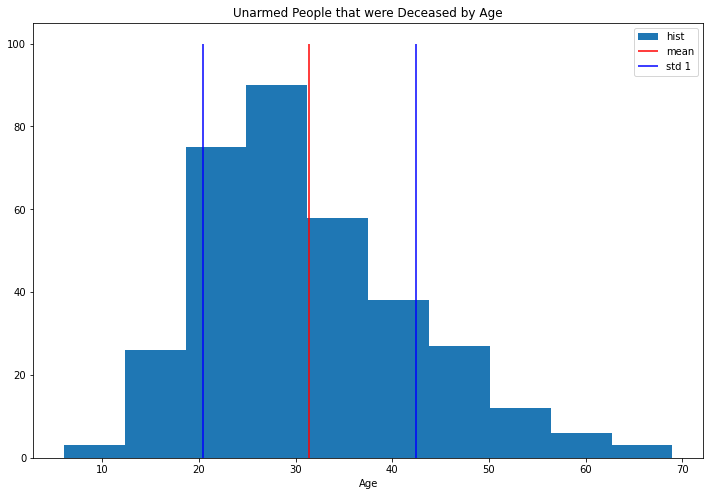

20.391213804421277 42.425354242916


In [43]:
#plotting the data
plt.subplots(figsize = (12,8))
plt.hist(dataset, label = "hist")
plt.vlines(mean, 0, 100, color = "r", label = "mean")
plt.vlines([mean - std, mean + std], 0, 100, color = "b", label = "std 1")
plt.legend()
plt.xlabel("Age")
plt.title("Unarmed People that were Deceased by Age")
plt.show()

print(mean - std, mean + std)

#### based on the graph above, around 68.27% casualties are people that are age between approximately 20 - 42 years old

#### Finding the highest casualty cases by state

In [44]:
#filtering data 
state_count = df.groupby("State")["Name"].count().reset_index()
state_abbr = pd.read_csv("C:/work/kaggle/murder_cases/test.csv")

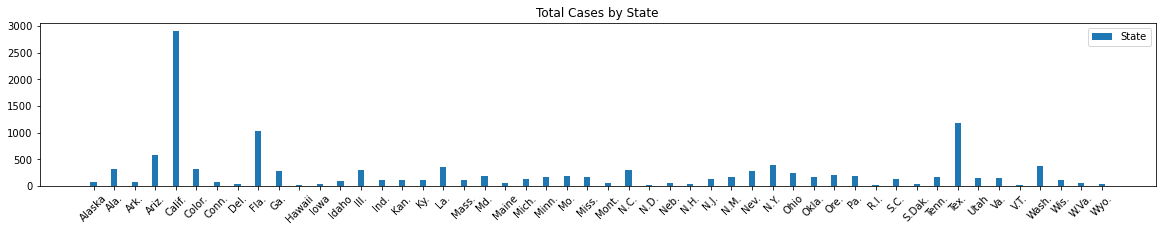

In [46]:
#plot the data
plt.subplots(figsize = (20,3))
plt.bar(list(state_abbr.sort_values("2")["3"]), list(state_count["Name"]), align = "center", width = 0.3, label = "State")
plt.xticks(rotation = 45)
plt.legend()
plt.title("Total Cases by State")
plt.show()

#### Based on the graph, California by far has the highest rate of cases amongst other states

#### Finding the proportion of reason of death

In [ ]:
#filter the data
reason_death_count = df.groupby("Manner_of_death")["Name"].count().reset_index()

In [ ]:
#plotting the data
plt.subplots(figsize = (12,8))
plt.pie(list(reason_death_count["Name"]), labels = list(reason_death_count["Manner_of_death"]), autopct = "%0.2f%%")
plt.axis()
plt.plot()